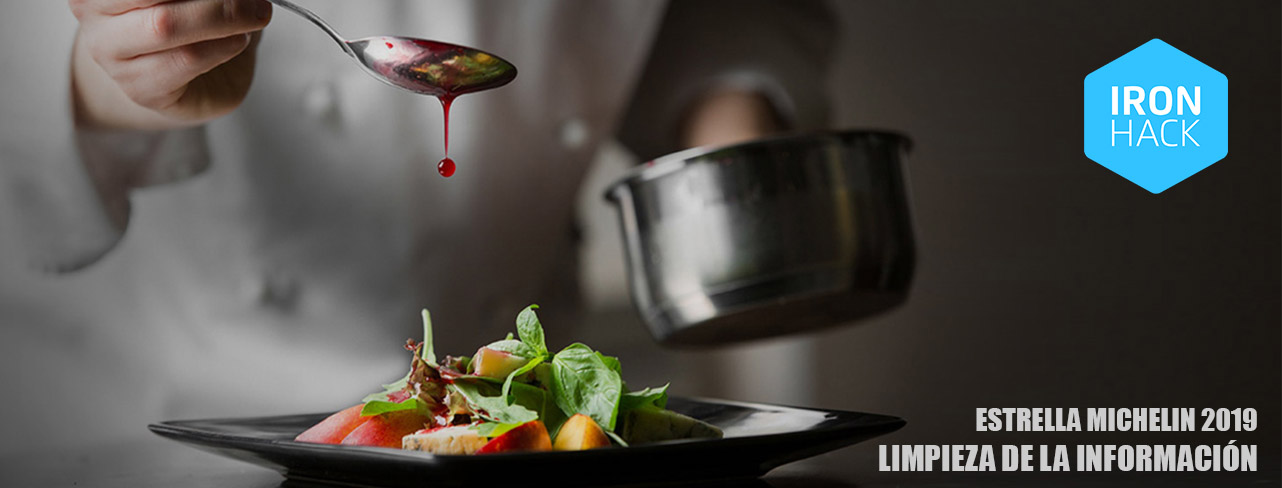

In [1]:
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import numpy as np
import src.scrapping as sc
import requests
from bs4 import BeautifulSoup
import re

#### En esta parte vamos a trabajar sobre todo en la inserción de información, puesto que el dataset dado está perfectamente limpio y no necesita de ningún ajuste. Para poder ir aumentando el dataset nos vamos a ayudar de la columna de url.

In [3]:
data = pd.read_csv('../data/estrellas_Michelin_2019.csv')

In [4]:
data.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...


In [5]:
data.url.head(3)

0    https://guide.michelin.com/at/en/vienna/wien/r...
1    https://guide.michelin.com/us/en/california/so...
2    https://guide.michelin.com/us/en/california/sa...
Name: url, dtype: object

#### Añadiremos a nuestro dataset el precio de cada restaurante en un valor cuantitativo.

In [6]:
precios_en_sucio = data.url.apply(sc.scrap_precio)

In [7]:
precios_en_sucio.head()

0     [95, 255, [EUR]]
1         [275, [USD]]
2         [325, [USD]]
3    [195, 298, [USD]]
4         [298, [USD]]
Name: url, dtype: object

####  Nos encontramos con que el precio aparece en distintas monedas y además en muchos casos nos marca una horquilla de precios, así que vamos a pasar todos los precios a euros y además haremos una media de precio para cada restaurante

In [9]:
precios_euros = precios_en_sucio.apply(sc.cambio_a_euro)

In [10]:
precios_euros.head()

0      [95.0, 255.0]
1            [231.0]
2            [273.0]
3    [163.8, 250.32]
4           [250.32]
Name: url, dtype: object

In [11]:
media_precios = precios_euros.apply(sc.media_precios)

In [12]:
media_precios.head()

0    175.00
1    231.00
2    273.00
3    207.06
4    250.32
Name: url, dtype: float64

#### Ya tenemos las columnas con los precios lo que nos va a permitir trabajar en la visualización en el siguiente punto, así que sigamos alimentando el dataset y añadamos teléfono, mail propio del restaurante y horarios.

In [13]:
telefonos = data.url.apply(sc.scrap_telefono)

In [14]:
telefonos.head()

0    +43 660 9070500
1    +1 408-354-4330
2    +1 415-685-4860
3    +1 415-775-8500
4    +1 415-440-0460
Name: url, dtype: object

In [27]:
webs_propias = data.url.apply(sc.scrap_mail_propio)

In [29]:
webs_propias.head()

0    www.restaurant-amador.com
1    www.manresarestaurant.com
2               www.benusf.com
3     www.quincerestaurant.com
4         www.ateliercrenn.com
Name: url, dtype: object

In [19]:
horarios = data.url.apply(sc.scrap_horarios)

In [20]:
horarios.head()

0                      Closed: Monday, Tuesday, Sunday
1    Closed: Monday, Tuesday, lunch : Wednesday-Sunday
2     Closed: Monday, lunch : Tuesday-Saturday, Sunday
3     Closed: Monday, lunch : Tuesday-Saturday, Sunday
4     Closed: Monday, lunch : Tuesday-Saturday, Sunday
Name: url, dtype: object

#### Ya tenemos todos los datos que nos interesan, hemos limpiado y modificado su estructura y su valor para que se ajusten a nuestras necesidades, ahora tenemos que añadir las columnas que queramos a nuestro dataset y esportar un csv para poder trabajar la visualización.

In [23]:
data['media_precios_€'] = media_precios

In [24]:
data.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,media_precios_€
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,175.00
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,231.00
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,273.00
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,207.06
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,250.32


In [25]:
data['phone'] = telefonos

In [26]:
data.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,media_precios_€,phone
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,175.00,+43 660 9070500
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,231.00,+1 408-354-4330
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,273.00,+1 415-685-4860
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,207.06,+1 415-775-8500
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,250.32,+1 415-440-0460


In [80]:
data['restaurant_web'] = webs_propias

In [81]:
data.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,media_precios_€,phone,restaurant_web
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,175.00,+43 660 9070500,www.restaurant-amador.com
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,231.00,+1 408-354-4330,www.manresarestaurant.com
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,273.00,+1 415-685-4860,www.benusf.com
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,207.06,+1 415-775-8500,www.quincerestaurant.com
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,250.32,+1 415-440-0460,www.ateliercrenn.com


In [82]:
data['horarios'] = horarios

In [83]:
data.head()

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,media_precios_€,phone,restaurant_web,horarios
0,Amador,2019,48.25406,16.35915,Wien,Austria,1190,Creative,$$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,175.00,+43 660 9070500,www.restaurant-amador.com,"Closed: Monday, Tuesday, Sunday"
1,Manresa,2019,37.22761,-121.98071,South San Francisco,California,95030,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,231.00,+1 408-354-4330,www.manresarestaurant.com,"Closed: Monday, Tuesday, lunch : Wednesday-Sunday"
2,Benu,2019,37.78521,-122.39876,San Francisco,California,94105,Asian,$$$$,https://guide.michelin.com/us/en/california/sa...,273.00,+1 415-685-4860,www.benusf.com,"Closed: Monday, lunch : Tuesday-Saturday, Sunday"
3,Quince,2019,37.79762,-122.40337,San Francisco,California,94133,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,207.06,+1 415-775-8500,www.quincerestaurant.com,"Closed: Monday, lunch : Tuesday-Saturday, Sunday"
4,Atelier Crenn,2019,37.79835,-122.43586,San Francisco,California,94123,Contemporary,$$$$,https://guide.michelin.com/us/en/california/sa...,250.32,+1 415-440-0460,www.ateliercrenn.com,"Closed: Monday, lunch : Tuesday-Saturday, Sunday"


In [86]:
data.to_csv('../data/estrellasMichelin.csv')